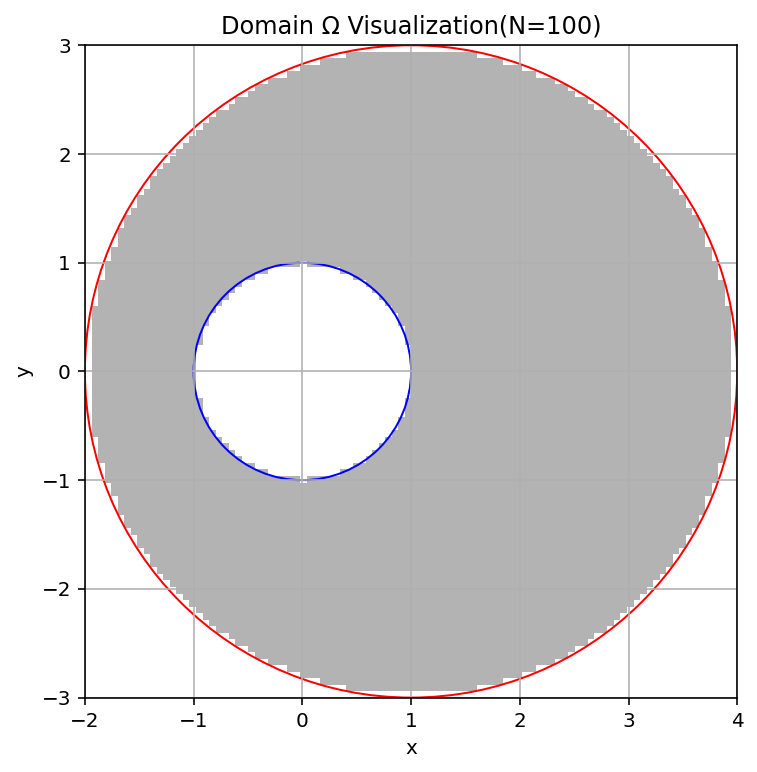

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
Nx = 100
Ny = 100
x = np.linspace(-2, 4, Nx)
y = np.linspace(-3, 3, Ny)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig, ax = plt.subplots(figsize=(6,6))
condition = (Z > 1) & ((X-1)**2 + Y**2 < 9)

plt.imshow(condition, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Greys', alpha=0.3)
circle1 = plt.Circle((0, 0), 1, color='blue', fill=False)
circle2 = plt.Circle((1, 0), 3, color='red', fill=False)
ax.add_artist(circle1)
ax.add_artist(circle2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Domain Ω Visualization(N={})'.format(Nx))
plt.grid(True)
plt.show()

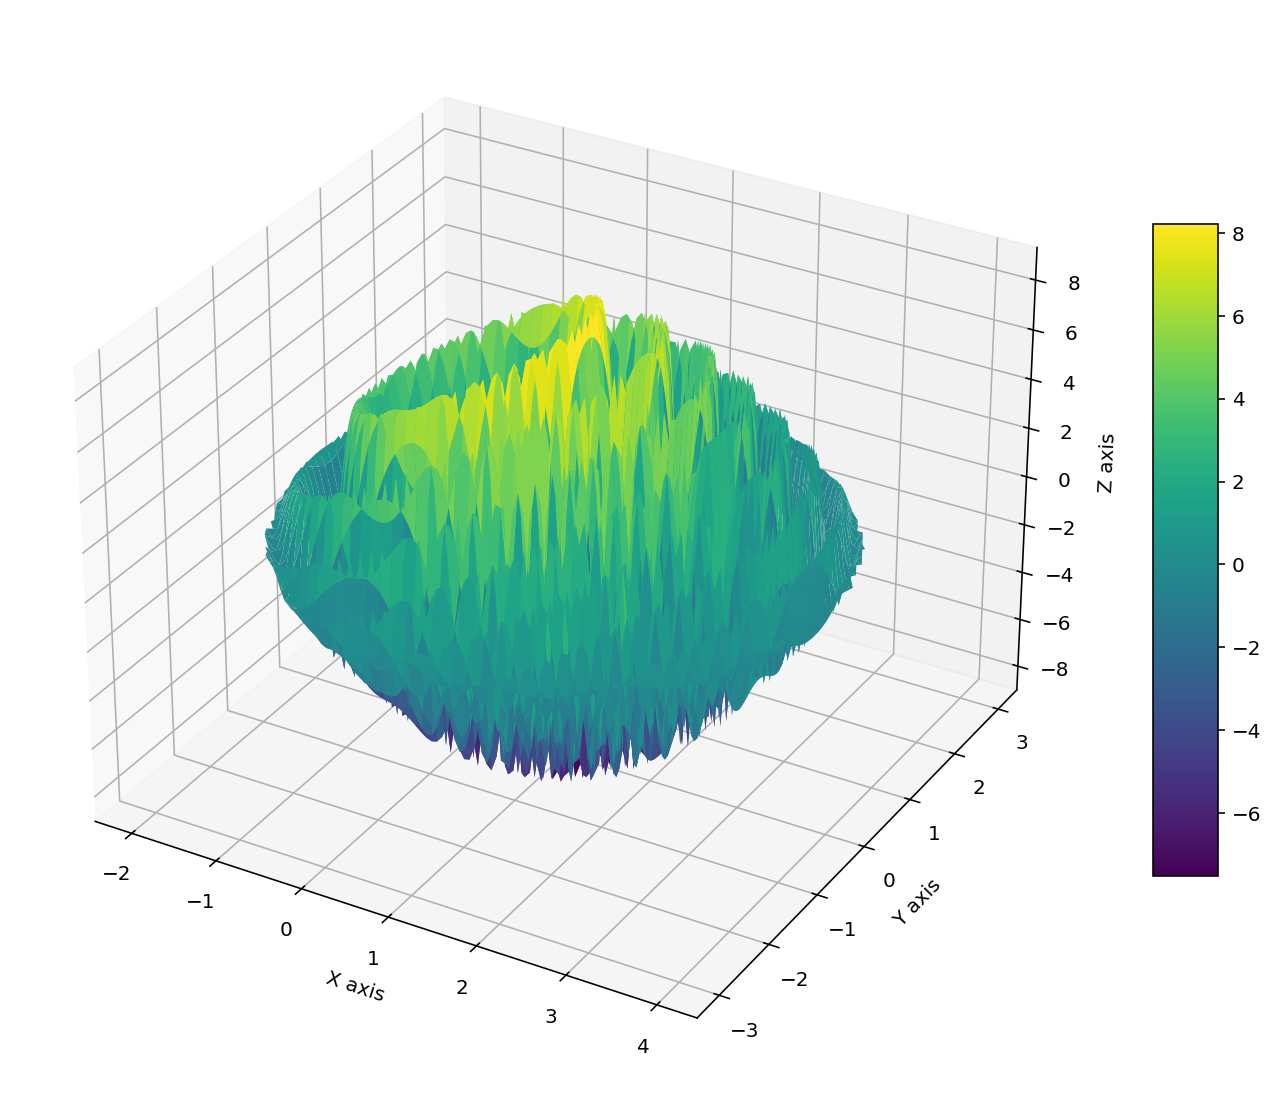

In [2]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

def ux_boundary0(x,y):
    R = (x**2+y**2)
    R2 = (x - 1)**2 + y**2 - 9
    f = np.sin(np.pi*R)*R2
    return f

Z = ux_boundary0(X, Y)

Z_masked = np.ma.masked_where(~condition, Z)

surf = ax.plot_surface(X, Y, Z_masked, cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

In [4]:
from tqdm import tqdm

U0 = Z.copy()
U0[~condition] = 0

dx = 1/Nx
dy = 1/Ny
tfinal = 10000
dt = 2/(Nx)**2
Rx = dt/(10*dx**2)
Ry = dt/(10*dy**2)
Px = dt/dx
Py = dt/dy
U1 = np.zeros_like(U0)
U_list = [U0]
o = 0
t = 0
time_record = [100, 1000, 2000, 3000, 5000, 6000, 8000, 9000, tfinal]
while o <= tfinal:
    U = U0
    U1 = np.zeros_like(U)
    for i in range(1, Nx - 1):
        for j in range(1, Nx - 1):
            
            domain = condition[i, j]
            
            if domain == True:
                m1 = U[i, j]
                m2 = U[i + 1, j]
                m3 = U[i - 1, j]
                m4 = U[i, j + 1]
                m5 = U[i, j - 1]
                U1[i, j] = (1 - 2*Rx - 2*Ry) * m1 + (Rx-Px) * m2 + (Rx + Px) * m3 + (Ry - Py)*m4 + (Ry + Py) * m5
            else:
                continue   
    o += 1
    if o in time_record:
        print('Record Solution for {}dt'.format(o))
        U_list.append(U1)
    U0 = U1

Record Solution for 100dt
Record Solution for 1000dt
Record Solution for 2000dt
Record Solution for 3000dt
Record Solution for 5000dt
Record Solution for 6000dt
Record Solution for 8000dt
Record Solution for 9000dt
Record Solution for 10000dt


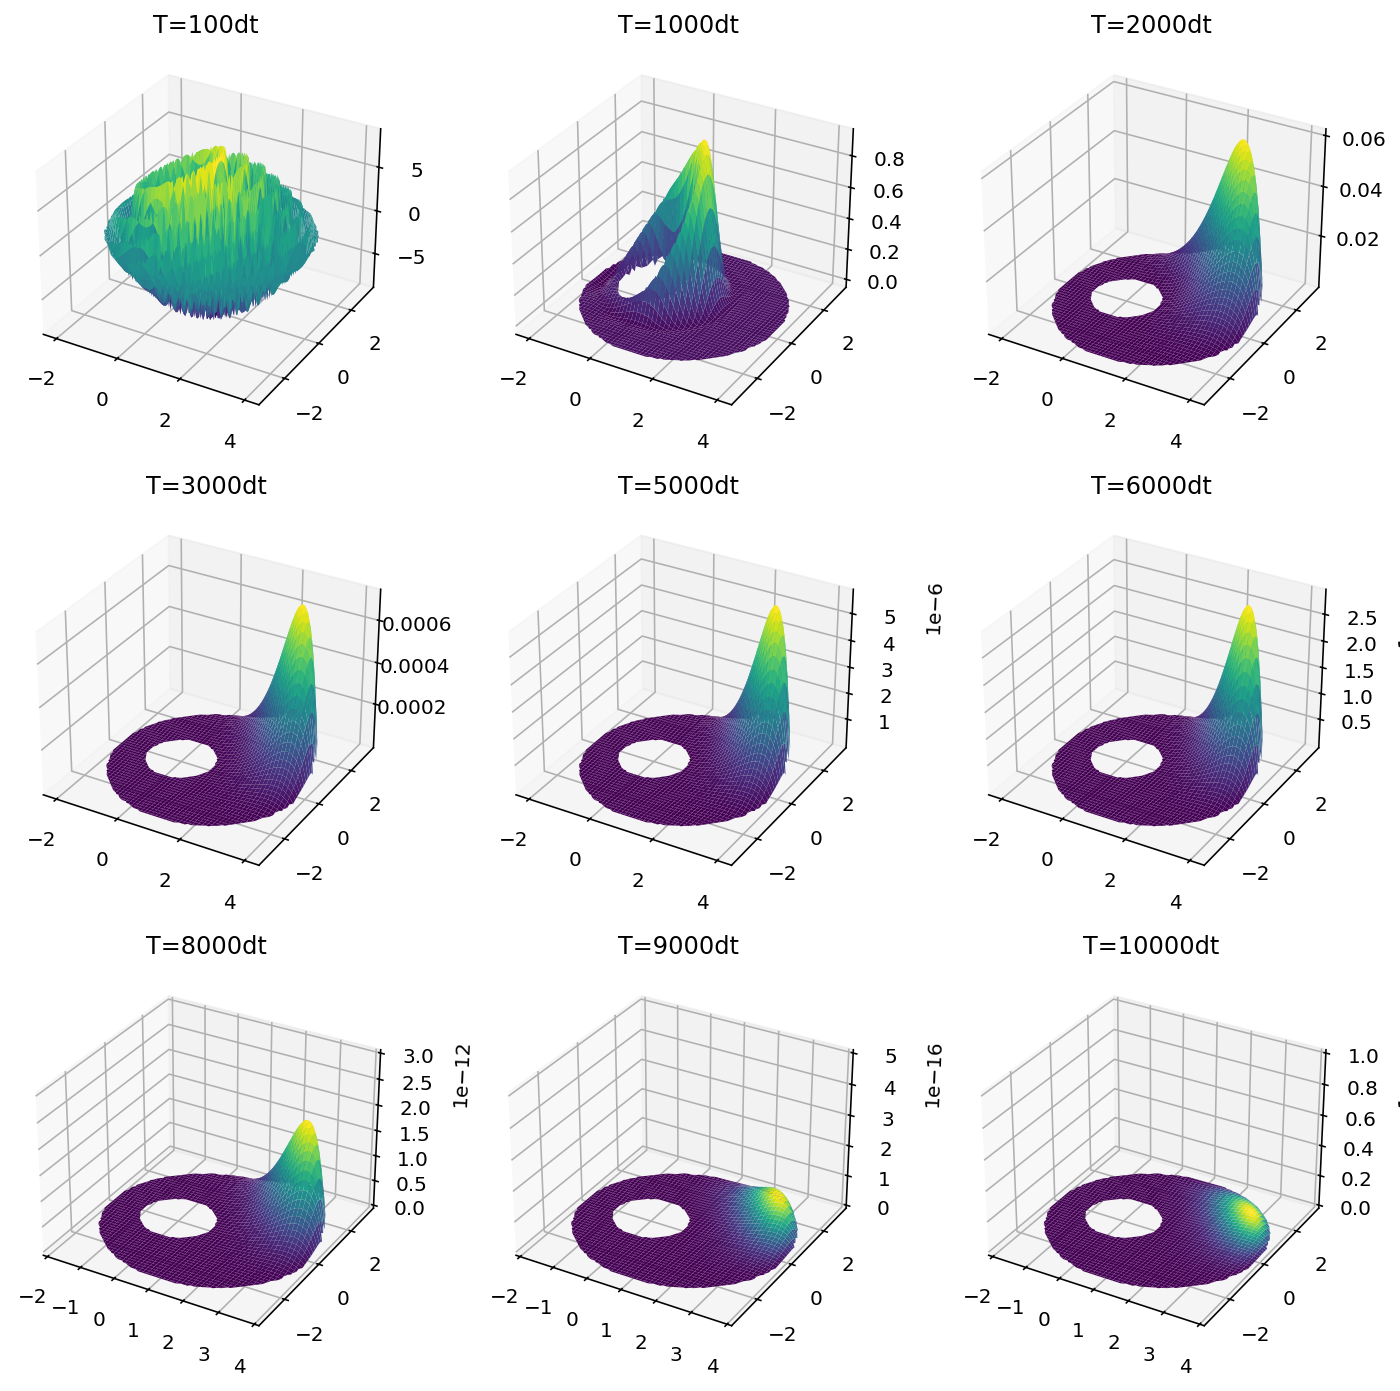

In [54]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize = (12, 12))
for i in range(1, 10):
    Z_masked = np.ma.masked_where(~condition, U_list[i - 1])
    ax = fig.add_subplot(int('33{}'.format(i)), projection='3d')
    ax.plot_surface(X, Y, Z_masked, cmap='viridis', edgecolor='none')
    plt.title('T={}dt'.format(time_record[i - 1]))
    if i - 1 == 6:
        ax.set_zlim(0,3e-12)
        ax.set_xlim(-2,4)
    if i - 1 == 7:
        ax.set_zlim(0,5e-16)
        ax.set_xlim(-2,4)
    if i - 1 == 8:
        ax.set_zlim(0,1e-17)
        ax.set_xlim(-2,4)

(-2.0, 4.0)

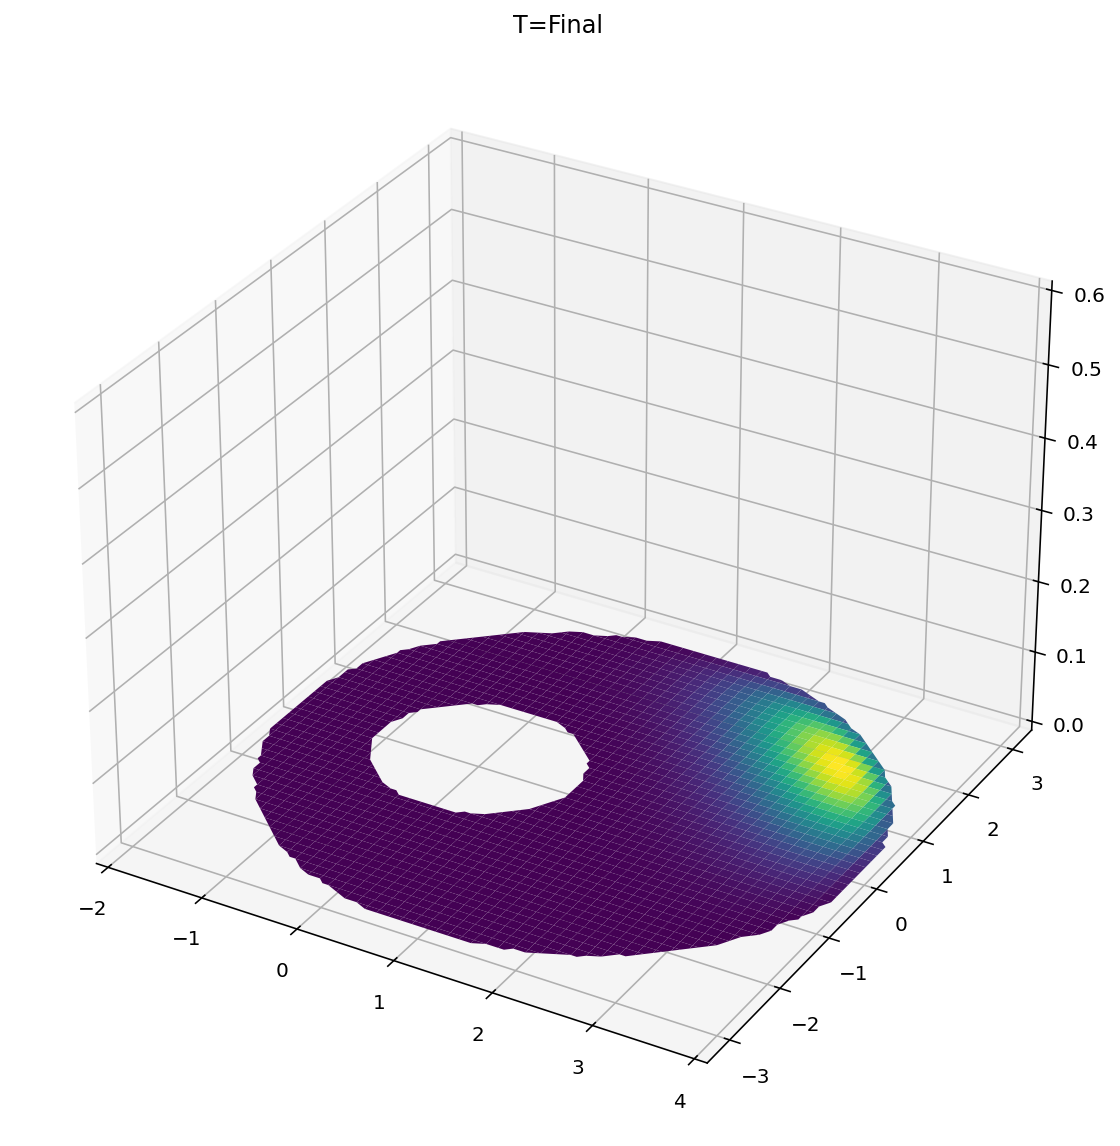

In [27]:
# Mask the values outside the domain Ω so they are not plotted
K = -1
Z_masked = np.ma.masked_where(~condition, U_list[K])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(X, Y, Z_masked, cmap='viridis', edgecolor='none')
plt.title('T=Final'.format(K))
ax.set_zlim(0,0.6)
ax.set_xlim(-2,4)